In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as k
from tensorflow.keras import utils

In [2]:
batch_size = 128
num_classes = 10
epochs = 50


In [3]:
# the data split from train and test set
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
#  printing the input shape
print("The input shape is ", x_train.shape)
print("The output shape ", y_train.shape)

The input shape is  (60000, 28, 28)
The output shape  (60000,)


In [5]:
# the input image dimension
img_rows, img_cols = x_train.shape[1:]

In [6]:
if k.image_data_format()=='channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape[x_test.shape[0], 1, img_rows, img_cols]
    input_shape = (1,img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# now we are normalizing the dataset
x_train = x_train/255
x_test = x_test/255

# since the ouput for each image is scaler , we will convert it to categorical variable , this will help us the softmax classification 
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [8]:
# creating the Convolution model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', kernel_initializer='he_uniform', input_shape=input_shape))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_uniform' ))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

# now compilig the model
model.compile(loss =keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adadelta(), metrics = ['accuracy'])

In [9]:
# now training the model
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data=(x_test, y_test))

Epoch 1/50
469/469 [==============================] - 22s 40ms/step - loss: 2.7575 - accuracy: 0.1359 - val_loss: 1.9508 - val_accuracy: 0.4000
Epoch 2/50
469/469 [==============================] - 15s 31ms/step - loss: 2.2298 - accuracy: 0.2287 - val_loss: 1.6838 - val_accuracy: 0.6007
Epoch 3/50
469/469 [==============================] - 17s 36ms/step - loss: 1.9367 - accuracy: 0.3257 - val_loss: 1.4588 - val_accuracy: 0.6845
Epoch 4/50
469/469 [==============================] - 14s 31ms/step - loss: 1.7301 - accuracy: 0.4074 - val_loss: 1.2595 - val_accuracy: 0.7351
Epoch 5/50
469/469 [==============================] - 14s 30ms/step - loss: 1.5650 - accuracy: 0.4739 - val_loss: 1.0880 - val_accuracy: 0.7663
Epoch 6/50
469/469 [==============================] - 14s 30ms/step - loss: 1.4229 - accuracy: 0.5249 - val_loss: 0.9467 - val_accuracy: 0.7925
Epoch 7/50
469/469 [==============================] - 14s 31ms/step - loss: 1.3122 - accuracy: 0.5666 - val_loss: 0.8372 - val_accuracy:

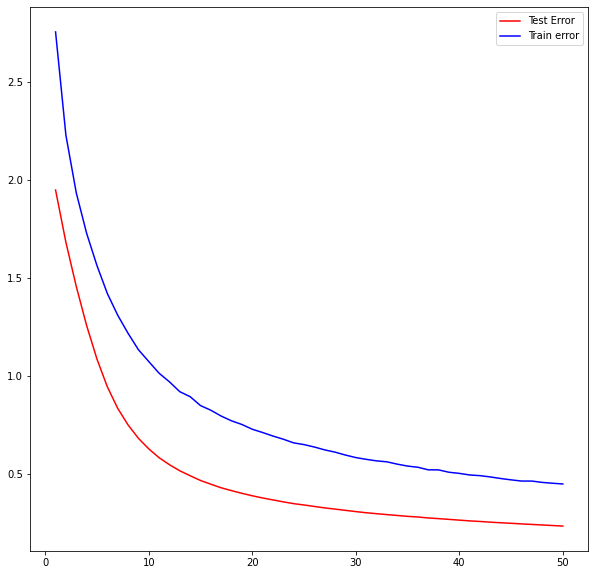

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
test_errors = history.history['val_loss']
train_errors = history.history['loss']
num_iterations= list(range(1, epochs+1))
plt.figure(figsize = (10,10))

plt.plot( num_iterations,test_errors ,color = 'r', label= 'Test Error' )
plt.plot(num_iterations,train_errors , color = 'b', label = 'Train error')
plt.legend()
plt.show()

Its evident from above loss graph that our model is not overfitting on the train dataset as the test loss is less than train dataset loss

In [ ]:
score = model.evaluate(x_test, y_test, verbose = 1)
print("The test loss is ", score[0])
print("The test accuracy is ", score[1])